<font size="5">

# LET measurements 2022: MG.REF preparations

<font size="3">

> __Author:__ A. Backis
<br/>__Institute:__ University of Glasgow (UoG), European Spallation Source (ESS)
    
> __Author:__ R. Wahlén
<br/>__Institute:__ , Lund University (LU), European Spallation Source (ESS)
<br/>__Date:__ 21/2-2022

_Abstract:_
This notebook contains the data analysis used for preparations with the MG.REF Multi-Grid detector.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Parameters](#PARAMETERS)
* [2. Plotting](#PLOTTING)

# 1. Introduction<a class="anchor" id="INTRODUCTION"></a>

This notebook outlines the preparations made with the MG.REF detector.

## 1.1 Packages<a class="anchor" id="PACKAGES"></a>

Import the required packages.

In [1]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# Ensure custom packages can be reached
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Install packages
!{sys.executable} -m pip install ipympl

# General packages
import numpy as np
import pandas as pd

# Local packages
import file_handling.mg_mesytec_manage as mg_manage
import file_handling.mg_mesytec_seq_read_and_cluster as mg_read
import plotting.mg_mesytec_basic_plot as mg_basic_plot

# Activate matplotlib in interactive notebook mode
%matplotlib widget

## 1.2 Parameters<a class="anchor" id="PARAMETERS"></a>

Define global parameters.

In [2]:
# Paths to folders containing data
nb_path = os.getcwd()
MG_RAW_FOLDER = nb_path + '/../data/mg_ref/raw/'
MG_PROCESSED_FOLDER = nb_path + '/../data/mg_ref/processed/'

# MG standard filter
mg_filter = {'wm': [1, 1, True],                  # Wire multiplicity
             'gm': [1, 5, True],                  # Grid multiplicity
             'wadc': [800, np.inf, False],          # Wire charge
             'gadc': [800, np.inf, False],          # Grid charge
             'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
             'time': [0, np.inf, True],            # Time (TDC channels)
             'bus': [0, 9, True],                  # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 15, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'max_dist': [0, 1, False],             # MAximum jump of grids in coincidance      
             'gch': [96, 132, False]}              # Grid channel, bottom=64 to top=100

# MG standard parameters
mg_area = 0.0225*0.0225*4*38 # m^2


# 2. Plotting<a class="anchor" id="PLOTTING"></a>

In [15]:
# Extract data
bus =9
file_name = 'mvmelst_242_201104_115413.mvmelst'
file_path = MG_RAW_FOLDER + file_name + '.zip'
#mg_manage.extract_and_save(file_name, file_path, MG_PROCESSED_FOLDER) # Only have to run this once
mg_clu_run_1, mg_ev_run_1 = mg_manage.load_clusters_and_events(file_name, MG_PROCESSED_FOLDER)
print(mg_clu_run_1.time.values[-1])
print(mg_ev_run_1.time.values[-1])
mg_basic_plot.mg_plot_basic_bus('Somerun', bus, mg_clu_run_1, mg_ev_run_1, mg_filter, mg_area)

147261489733
958905051168


IndexError: index -1 is out of bounds for axis 0 with size 0

In [3]:
file_name = 'mvmelst_242_201104_115413.mvmelst'
file_path = MG_RAW_FOLDER + file_name + '.zip'
unzipped_path = mg_read.unzip_data(file_path)
data = mg_read.import_data(unzipped_path)

In [5]:
# Extract clusters 
clusters = mg_read.extract_clusters(data)

Percentage: 0


NameError: name 'buss' is not defined

0


In [106]:
clusters_filtered=mg_manage.filter_data(clusters,mg_filter)
fixed=clusters_filtered.index.tolist()
num_itms=len(fixed)
indx=fixed[0]
clusters_filtered.gcha[indx]

99

In [102]:
indx=fixed[0]
clusters_filtered.max_dist[indx]

1

2240


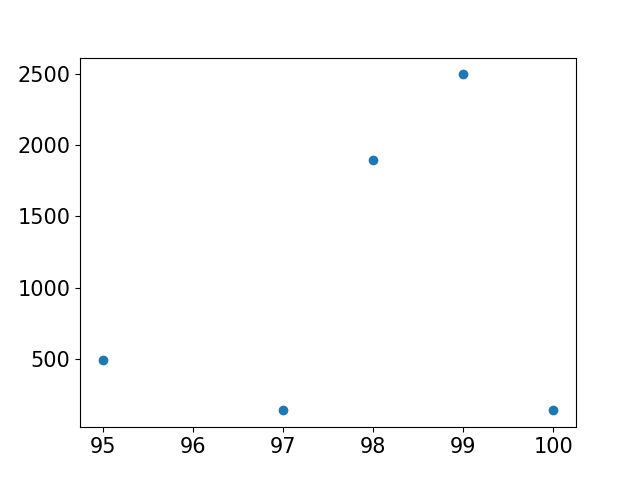

The number of "skipped" grids are:  1
10


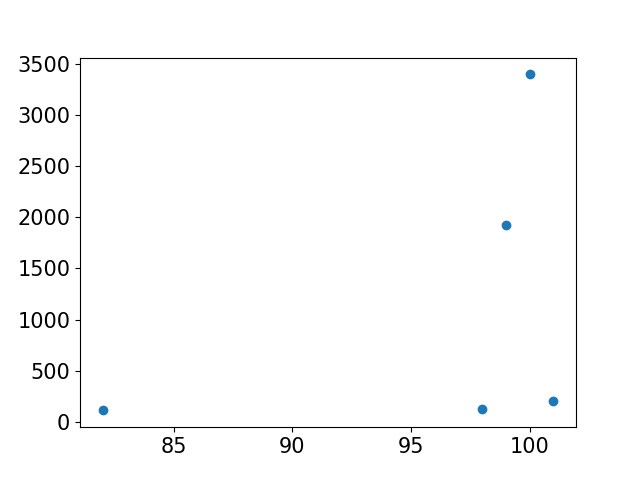

The number of "skipped" grids are:  14


In [108]:
# Plot

#mg_basic_plot.mg_plot_basic_bus(file_name, bus, mg_clu_run_1, mg_ev_run_1, mg_filter, mg_area, file_name)
mg_basic_plot.mg_plot_grid_distrobution(clusters,file_name)
mg_basic_plot.mg_plot_grid_distrobution(clusters_filtered,file_name)

In [ ]:
#mg_basic_plot.mg_plot_basic_bus('run_7_and_8', bus, clu_full, ev_full, mg_filter, area):